#Modelos SIR e SIER
Os modelos SIR e SIER são modelos matemáticos usados na epidemiologia para descrever e prever a propagação de doenças infecciosas em populações. Ambos os modelos dividem a população em diferentes compartimentos com base no status da infecção, mas o modelo SIER é uma extensão do SIR que inclui um compartimento adicional para considerar a exposição.

Modelo SIR (Susceptível-Infectado-Recuperado):

*   Suscetíveis (S): Representam os indivíduos que ainda não foram infectados pela doença, mas são suscetíveis à infecção.
*   Infectados (I): Representam os indivíduos que estão atualmente infectados e capazes de transmitir a doença.
*   Recuperados (R): Representam os indivíduos que se recuperaram da doença e adquiriram imunidade ou faleceram, não podendo ser infectados novamente.

O modelo SIR é descrito por três equações diferenciais que descrevem a taxa de variação de cada compartimento em relação ao tempo. Essas equações dependem de parâmetros que descrevem a taxa de transmissão da doença, a taxa de recuperação e a taxa de mortalidade.







#Modelo SIER
Modelo SIER (Susceptível-Infectado-Exposto-Recuperado):

*   Suscetíveis (S): Representam os indivíduos que ainda não foram infectados pela doença, mas são suscetíveis à infecção.
*   Infectados (I): Representam os indivíduos que estão atualmente infectados e capazes de transmitir a doença.
*   Expostos (E): Representam os indivíduos que foram expostos ao patógeno, mas ainda não são infecciosos. Isso é particularmente relevante para doenças com um período de incubação, onde o indivíduo pode ser infectado, mas não está apresentando sintomas.
*   Recuperados (R): Representam os indivíduos que se recuperaram da doença e adquiriram imunidade ou faleceram.

O modelo SIER é uma extensão do SIR que leva em consideração o tempo entre a exposição e o desenvolvimento de sintomas infecciosos. Essa extensão torna o SIER mais preciso para lidar com doenças que têm um período de incubação.


Ambos os modelos são representados por sistemas de equações diferenciais, e sua dinâmica é governada por parâmetros que descrevem a taxa de transmissão da doença, a taxa de recuperação, a taxa de mortalidade, o período de incubação (no caso do SIER) e a taxa de natalidade e morte na população. Esses modelos permitem simular a propagação da doença ao longo do tempo e são amplamente utilizados na epidemiologia para entender como as doenças se espalham e avaliar estratégias de controle, como a vacinação e o distanciamento social.

#Cadeias de Markov e modelos SIR e SIER
Depois dessa breve explicação de como funciona essa ferramente muito utilizada para estudar epidemias, apresentarei uma outra forma de se simular uma epidemia. Essa é uma versão mais simples e não tão acurada desses modelos, feitos por meio de uma cadeia de markov com 3 ou 4 estados, dependendo do modelo escolhido. Nesse artigo, irei começar fazendo uma demonstração/simulação pelo modelo original, com equações diferenciais e depois mostrarei os resultados com a cadeia de markov. Importante ressaltar o tamanho dos gráficos, apesar do formato das curvas serem parecidas nos gráficos, o tamanho delas é bem diferente.





In [ ]:
# Bibliotecas utilzadas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Modelo SIR (original)

Para simular o modelo SIR utilizarei essas equações diferenciais:

$$
\begin{align}
\frac{dS}{dt} &= -\beta \cdot S \cdot I \\
\frac{dI}{dt} &= \beta \cdot S \cdot I - \gamma \cdot I \\
\frac{dR}{dt} &= \gamma \cdot I
\end{align}
$$

Nestas equações:

*   S(t), I(t) e R(t) representam o número de indivíduos nos compartimentos Suscetíveis, Infectados e Recuperados em um determinado momento t.
*   N é a população total, geralmente constante ao longo do tempo: N = S(t) + I(t) + R(t).
*   β é a taxa de transmissão da doença.
*   γ é a taxa de recuperação.

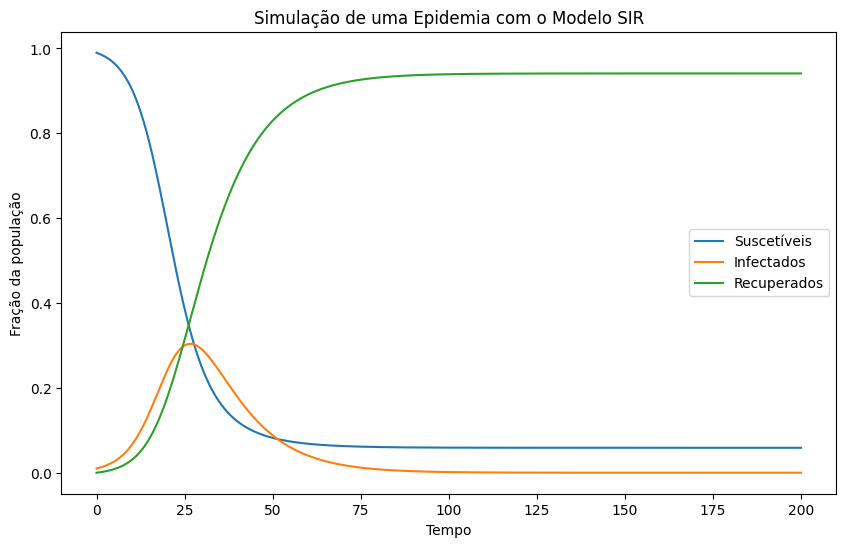

In [ ]:
# Definir as equações diferenciais do modelo SIR
def modelo_SIR(y, t, beta, gamma):
    S, I, R = y
    N = sum(y)
    dSdt = -beta * S * I/N
    dIdt = beta * S * I/N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Parâmetros do modelo
beta = 0.3  # Taxa de transmissão
gamma = 0.1  # Taxa de recuperação
S0 = 0.99  # Fração inicial de suscetíveis
I0 = 0.01  # Fração inicial de infectados
R0 = 0.0  # Fração inicial de recuperados

# Condições iniciais
y0 = [S0, I0, R0]

# Período de tempo para simulação
t = np.linspace(0, 200, 1000)

# Resolver as equações diferenciais usando odeint
sol = odeint(modelo_SIR, y0, t, args=(beta, gamma))

# Extrair as soluções
S, I, R = sol[:, 0], sol[:, 1], sol[:, 2]

# Plot dos resultados
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Suscetíveis')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Tempo')
plt.ylabel('Fração da população')
plt.legend()
plt.title('Simulação de uma Epidemia com o Modelo SIR')
plt.show()

#Simulação do modelo SIR mas utilizando uma Cadeia de Markov

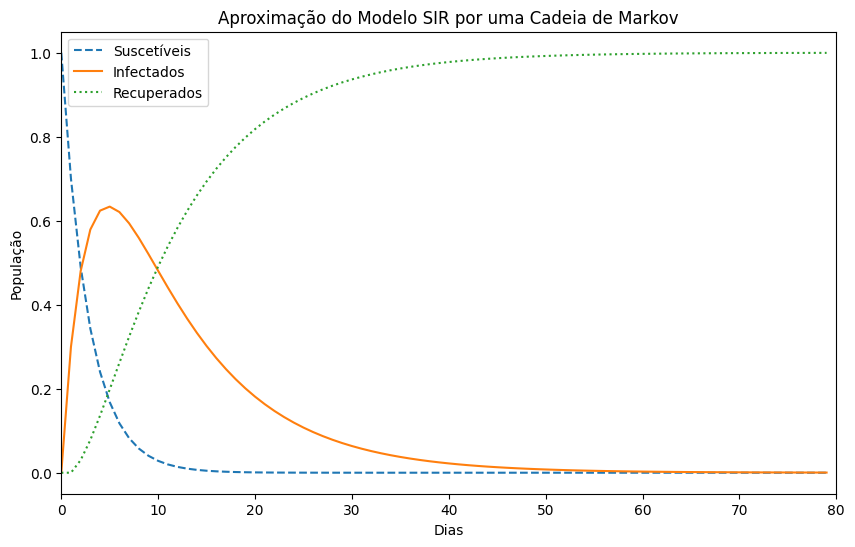

In [ ]:
# Parâmetros do modelo SIR
beta = 0.3  # Taxa de transmissão
gama = 0.1  # Taxa de recuperação

# Matriz de transição de Markov (SIR)
SIR = np.array(
   [[1 - beta,     beta,    0],
    [       0, 1 - gama, gama],
    [       0,        0,    1]]
)


# Vetor de distribuição inicial SIR, todos saudáveis
estado_inicial = np.array([1, 0, 0])

# Simulação da cadeia de Markov
simulacao = [estado_inicial]
for dia in range(1, 80): # Simulação de 80 dias
    novo_estado = np.dot(estado_inicial, SIR)
    simulacao.append(novo_estado)
    estado_inicial = novo_estado

# Extraindo os compartimentos da simulação
S_markov, I_markov, R_markov = zip(*simulacao)

# Plot dos resultados
plt.figure(figsize=(10, 6))
plt.plot(S_markov, label='Suscetíveis', linestyle='--')
plt.plot(I_markov, label='Infectados', linestyle='-')
plt.plot(R_markov, label='Recuperados', linestyle=':')
plt.xlabel('Dias')
plt.xlim(0, 80)
plt.ylabel('População')
plt.legend()
plt.title('Aproximação do Modelo SIR por uma Cadeia de Markov')
plt.show()


#Modelo SIER (original)

Para simular o modelo SIER utilizarei essas equações diferenciais
$$
\begin{align}
\frac{dS}{dt} &= -\beta \cdot S \cdot I \\
\frac{dE}{dt} &= \beta \cdot S \cdot I - \sigma \cdot E \\
\frac{dI}{dt} &= \sigma \cdot E - \gamma \cdot I \\
\frac{dR}{dt} &= \gamma \cdot I
\end{align}
$$


Nessas equações:

*   S(t), E(t), I(t) e R(t) representam o número de indivíduos nos compartimentos Suscetíveis, Expostos, Infectados e Recuperados em um determinado momento t.
*   N é a população total, geralmente constante ao longo do tempo: N = S(t) + E(t) + I(t) + R(t).
*   β é a taxa de transmissão da doença.
*   σ é a taxa de exposição (inverso do período de incubação).
*   γ é a taxa de recuperação.

Essas equações descrevem como a população muda ao longo do tempo em resposta à dinâmica da doença no modelo SIER. O compartimento "Expostos" representa indivíduos que foram expostos à doença, mas ainda não são infecciosos.

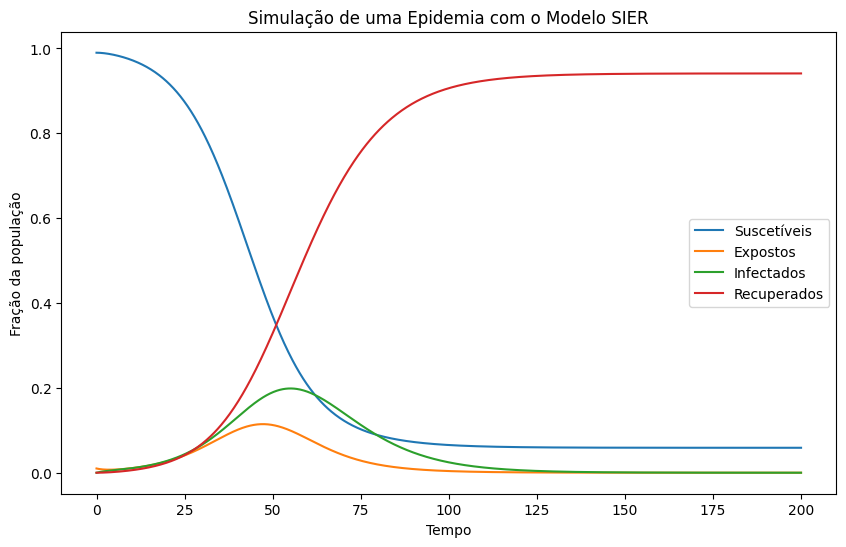

In [ ]:
# Definir as equações diferenciais do modelo SIER
def modelo_SIER(y, t, beta, gamma, sigma):
    S, E, I, R = y
    N = sum(y)
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# Parâmetros do modelo
beta = 0.3  # Taxa de transmissão
gamma = 0.1  # Taxa de recuperação
sigma = 0.2  # Taxa de exposição
S0 = 0.99  # Fração inicial de suscetíveis
E0 = 0.01  # Fração inicial de expostos
I0 = 0.0   # Fração inicial de infectados
R0 = 0.0   # Fração inicial de recuperados

# Condições iniciais
y0 = [S0, E0, I0, R0]

# Período de tempo para simulação
t = np.linspace(0, 200, 1000)

# Resolver as equações diferenciais usando odeint
sol = odeint(modelo_SIER, y0, t, args=(beta, gamma, sigma))

# Extrair as soluções
S, E, I, R = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

# Plot dos resultados
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Suscetíveis')
plt.plot(t, E, label='Expostos')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Tempo')
plt.ylabel('Fração da população')
plt.legend()
plt.title('Simulação de uma Epidemia com o Modelo SIER')
plt.show()


#Simulação do modelo SIER utilizando uma Cadeia de Markov

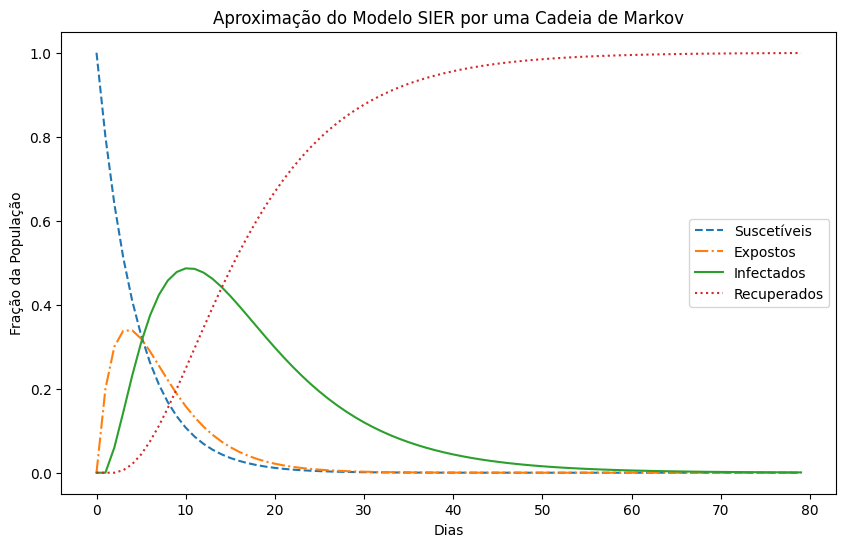

In [ ]:
# Parâmetros do modelo SIER
sigma = 0.2  # Taxa de exposição
beta = 0.3  # Taxa de transmissão
gamma = 0.1  # Taxa de recuperação

# Matriz de transição de Markov (SIER)
SIER = np.array(
    [[1 - sigma,     sigma,          0,      0],
     [        0,  1 - beta,       beta,      0],
     [        0,         0,  1 - gamma,  gamma],
     [        0,         0,          0,      1]]

)

# Vetor de distribuição inicial SIER, todos saudáveis
estado_inicial = np.array([1, 0, 0, 0])

# Simulação da cadeia de Markov
simulacao = [estado_inicial]
for dia in range(1, 80): # Simulação de 80 dias
    novo_estado = np.dot(estado_inicial, SIER)
    simulacao.append(novo_estado)
    estado_inicial = novo_estado

# Extraindo os compartimentos da simulação
S_simulacao, E_simulacao, I_simulacao, R_simulacao = zip(*simulacao)

# Plot dos resultados
plt.figure(figsize=(10, 6))
plt.plot(S_simulacao, label='Suscetíveis', linestyle='--')
plt.plot(E_simulacao, label='Expostos', linestyle='-.')
plt.plot(I_simulacao, label='Infectados', linestyle='-')
plt.plot(R_simulacao, label='Recuperados', linestyle=':')
plt.xlabel('Dias')
plt.ylabel('Fração da População')
plt.legend()
plt.title('Aproximação do Modelo SIER por uma Cadeia de Markov')
plt.show()

#Conclusão

Através da simulação dos modelos SIR (Susceptível-Infectado-Recuperado) e SIER (Susceptível-Infectado-Exposto-Recuperado), podemos obter uma compreensão valiosa da dinâmica de propagação de doenças infecciosas em populações. Esses modelos nos permitem analisar como os compartimentos de indivíduos suscetíveis, infectados, recuperados (no caso do modelo SIR) e expostos (no caso do modelo SIER) evoluem ao longo do tempo, considerando taxas de transmissão e recuperação. No entanto, é importante ressaltar que, embora seja possível aproximar esses modelos por meio de uma cadeia de Markov discretizada no tempo, essa simplificação pode não capturar todos os detalhes da dinâmica real da doença, como demonstrado nos casos acima, que possuem os mesmos parâmetros mas resultados diferentes. As aproximações podem ser menos precisas em cenários complexos e variáveis, como a interação entre diferentes grupos etários, intervenções de saúde pública e mudanças no comportamento humano. Portanto, embora esses modelos sejam valiosos para estudos epidemiológicos, é fundamental interpretar seus resultados com cautela e considerar suas limitações na previsão de surtos reais de doenças. Importante notar que esse modelo não gera nenhum tipo de dado, então não é possível aplicar modelos como SVD e PCA para analisar tais dados.

#Referências
*   https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwja8uSq9pGCAxXdr5UCHS5xBVEQFnoECA0QAQ&url=https%3A%2F%2Fperiodicos.unb.br%2Findex.php%2Fphysicae%2Farticle%2Fdownload%2F36012%2F29337%2F100955&usg=AOvVaw35AQa5cnyZiwPEj63uqdw0&opi=89978449